<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Worrying-About-Overfitting" data-toc-modified-id="Worrying-About-Overfitting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Worrying About Overfitting</a></span><ul class="toc-item"><li><span><a href="#Use-Train-Validation-Test" data-toc-modified-id="Use-Train-Validation-Test-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Use Train-Validation-Test</a></span></li><li><span><a href="#Model-Complexity-Graph" data-toc-modified-id="Model-Complexity-Graph-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model Complexity Graph</a></span><ul class="toc-item"><li><span><a href="#Early-Stopping" data-toc-modified-id="Early-Stopping-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Early Stopping</a></span></li></ul></li></ul></li><li><span><a href="#When-a-Good-Model-Goes-Bad" data-toc-modified-id="When-a-Good-Model-Goes-Bad-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>When a Good Model Goes Bad</a></span><ul class="toc-item"><li><span><a href="#L1-Regularization---Absolute-Value" data-toc-modified-id="L1-Regularization---Absolute-Value-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>L1 Regularization - Absolute Value</a></span></li><li><span><a href="#L2-Regularization---Squared-Value" data-toc-modified-id="L2-Regularization---Squared-Value-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>L2 Regularization - Squared Value</a></span></li><li><span><a href="#Comparing-L1-&amp;-L2-Regularization" data-toc-modified-id="Comparing-L1-&amp;-L2-Regularization-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Comparing L1 &amp; L2 Regularization</a></span></li><li><span><a href="#Code-Implementation" data-toc-modified-id="Code-Implementation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Code Implementation</a></span><ul class="toc-item"><li><span><a href="#Overcomplicated-Model" data-toc-modified-id="Overcomplicated-Model-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Overcomplicated Model</a></span></li><li><span><a href="#Regulated-Model" data-toc-modified-id="Regulated-Model-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Regulated Model</a></span></li></ul></li></ul></li><li><span><a href="#Dropout" data-toc-modified-id="Dropout-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dropout</a></span><ul class="toc-item"><li><span><a href="#Avoiding-the-Self-Perpetuating-Strength-Training" data-toc-modified-id="Avoiding-the-Self-Perpetuating-Strength-Training-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Avoiding the Self-Perpetuating Strength Training</a></span></li><li><span><a href="#Example-Code" data-toc-modified-id="Example-Code-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Example Code</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint


# Worrying About Overfitting

A big issue is making sure we don't overfit our model

## Use Train-Validation-Test

- Think of **training** as what you study for a test
- Think of **validation** is using a practice test (note sometimes called **dev**)
- Think of **testing** as what you use to judge the model 

> ***holdout*** is when your test dataset is never used for training (unlike in cross-validation)

> The **validation** & **test** sets should come from the same distribution.
>
> _Why would this matter?_

## Model Complexity Graph

- Underfitting
    + low complexity --> high bias, low variance
    + training error: large
    + testing error: large
- Overfitting
    + high complexity --> low bias, high variance
    + training error: low
    + testing error: large

### Early Stopping 
A widely used regularization technique in deep learning. It stops training when generalization error increases. 

Let's first create a model we can play around with:

In [3]:
# Get data to train with
digits = load_digits()
X = digits.data
y = digits.target # Note targets are simply 0-9 associated with class

# Convert target to one-hot encoded vector
y = keras.utils.to_categorical(y)
y.shape

(1797, 10)

> **NOTE**:
>
> We could have kept the targets as integers instead of using `to_categorical()` to make
> one-hot encoded vectors. In that case we would use [`SparseCategoricalCrossentropy`](https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class)
>
> For more on Keras' different built-in losses, see the documentation: https://keras.io/api/losses/

In [4]:
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, random_state=27, test_size=0.2)

X_train, X_valid, y_train, y_valid =\
    train_test_split(X_train, y_train, random_state=27, test_size=0.2)    

In [6]:
X_train

array([[ 0.,  0.,  9., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  5.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ..., 12.,  7.,  0.],
       [ 0.,  0.,  9., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 13.,  0.,  0.]])

In [7]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
X_train.shape

(1149, 64)

In [9]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64))
model.add(Dense(10, activation='sigmoid'))

# Note we use 'categorical_crossentropy' since target is one-hot encoded
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



We train our model but only keep the best model it comes across. We can do this with a [ModelCheckpoint callback](https://keras.io/callbacks/#modelcheckpoint)

In [10]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint]
)

Epoch 1/100
36/36 [==============================] - 1s 6ms/step - loss: 6.6368 - accuracy: 0.1218 - val_loss: 3.8057 - val_accuracy: 0.1319
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 2.8500 - accuracy: 0.1732 - val_loss: 2.3201 - val_accuracy: 0.1771
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 2.1120 - accuracy: 0.2681 - val_loss: 1.9607 - val_accuracy: 0.3229
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 1.8184 - accuracy: 0.3760 - val_loss: 1.7422 - val_accuracy: 0.4236
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 1.6013 - accuracy: 0.4473 - val_loss: 1.5691 - val_accuracy: 0.4583
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 1.4385 - accuracy: 0.4943 - val_loss: 1.4428 - val_accuracy: 0.5035
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 1.2985 - accuracy: 0.5440 - val_loss: 1.3514 - val_accuracy: 0.5208
Epoch 8/100
3

Epoch 59/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0629 - accuracy: 0.9861 - val_loss: 0.2154 - val_accuracy: 0.9306
Epoch 60/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 0.9878 - val_loss: 0.2229 - val_accuracy: 0.9271
Epoch 61/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9869 - val_loss: 0.2225 - val_accuracy: 0.9306
Epoch 62/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0562 - accuracy: 0.9869 - val_loss: 0.2066 - val_accuracy: 0.9340
Epoch 63/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9878 - val_loss: 0.1985 - val_accuracy: 0.9340
Epoch 64/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0553 - accuracy: 0.9878 - val_loss: 0.2017 - val_accuracy: 0.9340
Epoch 65/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9878 - val_loss: 0.2199 - val_accuracy: 0.9306
Epoch 

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

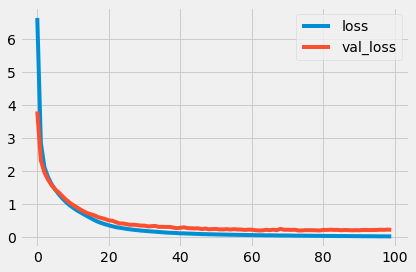

In [12]:
metrics = ['loss','val_loss']
for metric in metrics:
    plt.plot(history.history[metric], label=metric)

plt.legend()
plt.tight_layout()

In [13]:
# Now points to the best model found during the fit
model = keras.models.load_model("best_model.h5")

We can also stop our training early when our test error isn't really changing. We can do this with a [EarlyStopping callback](https://keras.io/callbacks/#earlystopping)

In [14]:
# Recreating/resetting the model
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


checkpoint = keras.callbacks.EarlyStopping(
                                monitor='val_loss', # What to watch
                                min_delta=0.1, # How much change to get
                                patience=5 # No change after 5 epochs
)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint]
)

Epoch 1/100
36/36 [==============================] - 1s 5ms/step - loss: 0.9446 - accuracy: 0.0992 - val_loss: 0.6044 - val_accuracy: 0.1736
Epoch 2/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.1358 - val_loss: 0.4763 - val_accuracy: 0.1944
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4379 - accuracy: 0.1741 - val_loss: 0.3972 - val_accuracy: 0.2257
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.2550 - val_loss: 0.3412 - val_accuracy: 0.2812
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.2959 - val_loss: 0.3021 - val_accuracy: 0.3264
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2820 - accuracy: 0.3316 - val_loss: 0.2691 - val_accuracy: 0.3819
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2530 - accuracy: 0.4421 - val_loss: 0.2431 - val_accuracy: 0.5035
Epoch 8/100
3

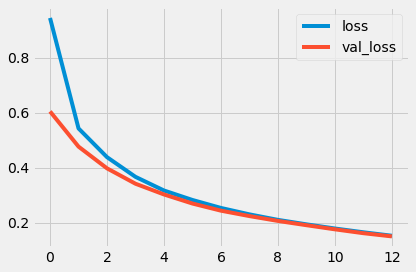

In [15]:
metrics = ['loss','val_loss']
for metric in metrics:
    plt.plot(history.history[metric], label=metric)

plt.legend()
plt.tight_layout()

# When a Good Model Goes Bad

When a model has large weights, the model is "too confident"

We need to punish large (confident) weights by contributing them to the error function

![](images/punishing_model_metaphor.jpg)

## L1 Regularization - Absolute Value

- Tend to get sparse vectors (small weights go to 0)
- Reduce number of weights
- Good feature selection to pick out importance

$$ J(W,b) = -\dfrac{1}{m} \sum^m_{i=1}\big[\mathcal{L}(\hat y_i, y_i)+ \dfrac{\lambda}{m}|w_i| \big]$$

## L2 Regularization - Squared Value

- Not sparse vectors (weights homogeneous & small)
- Tends to give better results for training

    
$$ J(W,b) = -\dfrac{1}{m} \sum^m_{i=1}\big[\mathcal{L}(\hat y_i, y_i)+ \dfrac{\lambda}{m}w_i^2 \big]$$

## Comparing L1 & L2 Regularization

> Typically you'll want to use L2 regularization 

+ subtle; consider vectors: [1,0] & [0.5, 0.5] 
+ recall we want smallest value for our value
+ L2 prefers [0.5,0.5] over [1,0] 

## Code Implementation


### Overcomplicated Model

In [16]:
def build_complex_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=64))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    
    return model

In [17]:
model = build_complex_model()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                250       
Total params: 3,722
Trainable params: 3,722
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid)
)

Epoch 1/100
36/36 [==============================] - 1s 4ms/step - loss: 2.4503 - accuracy: 0.1697 - val_loss: 1.7718 - val_accuracy: 0.3576
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 1.3439 - accuracy: 0.5753 - val_loss: 0.9811 - val_accuracy: 0.7014
Epoch 3/100
36/36 [==============================] - 0s 1ms/step - loss: 0.7556 - accuracy: 0.7702 - val_loss: 0.6280 - val_accuracy: 0.8021
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.8660 - val_loss: 0.4981 - val_accuracy: 0.8333
Epoch 5/100
36/36 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.9051 - val_loss: 0.3551 - val_accuracy: 0.8958
Epoch 6/100
36/36 [==============================] - 0s 1ms/step - loss: 0.2530 - accuracy: 0.9173 - val_loss: 0.3075 - val_accuracy: 0.9062
Epoch 7/100
36/36 [==============================] - 0s 1ms/step - loss: 0.1981 - accuracy: 0.9434 - val_loss: 0.2679 - val_accuracy: 0.9201
Epoch 8/100
3

36/36 [==============================] - 0s 1ms/step - loss: 2.2809e-05 - accuracy: 1.0000 - val_loss: 0.1204 - val_accuracy: 0.9792
Epoch 59/100
36/36 [==============================] - 0s 1ms/step - loss: 7.8080e-04 - accuracy: 1.0000 - val_loss: 0.1337 - val_accuracy: 0.9722
Epoch 60/100
36/36 [==============================] - 0s 1ms/step - loss: 2.8048e-05 - accuracy: 1.0000 - val_loss: 0.1355 - val_accuracy: 0.9757
Epoch 61/100
36/36 [==============================] - 0s 1ms/step - loss: 1.5115e-05 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 0.9792
Epoch 62/100
36/36 [==============================] - 0s 1ms/step - loss: 5.4852e-04 - accuracy: 1.0000 - val_loss: 0.2137 - val_accuracy: 0.9618
Epoch 63/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1171 - val_accuracy: 0.9792
Epoch 64/100
36/36 [==============================] - 0s 1ms/step - loss: 1.3609e-05 - accuracy: 1.0000 - val_loss: 0.1158 - val_accuracy: 0.

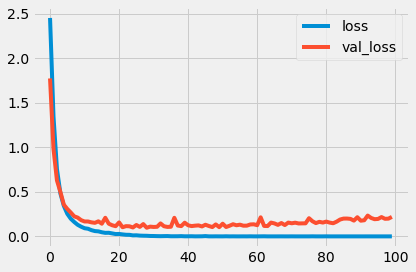

In [19]:
metrics = ['loss','val_loss']
for metric in metrics:
    plt.plot(history.history[metric], label=metric)

plt.legend()
plt.tight_layout()

We can see our overcomplicated model could use some regularization

### Regulated Model

* L1 regularization adds “absolute value of magnitude” as penalty term to the loss function. Some people say L1 can help with compressing the model. But in practice, L1 regularization makes your model sparse, helps only a little bit. L2 regularization is just used much more often.

* L2 regularization (also known as weight decay) adds “squared magnitude” as penalty term to the loss function and it is used much more often than L1.

**Application:** To add a regularizer to a layer, you simply have to pass in the prefered regularization technique to the layer’s keyword argument ‘kernel_regularizer’ then decide whether you want to add l1 or l2 regularization from keras.regularizers. You can tune the strength of the regularizer also. 

In [20]:
def build_regulated_model():
    model = Sequential()
    model.add(
        Dense(
            32, 
            activation='relu',
            kernel_regularizer=keras.regularizers.l2(l2=0.01),
            input_dim=64)
    )
    model.add(
        Dense(
            24, 
            activation='relu',
            kernel_regularizer=keras.regularizers.l2(l2=0.01)
        )
    )
    model.add(
        Dense(
            24, 
            activation='relu',
            kernel_regularizer=keras.regularizers.l2(l2=0.01)
        )
    )
    model.add(Dense(10, activation='sigmoid'))
    
    return model

In [21]:
model = build_regulated_model()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_10 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                250       
Total params: 3,722
Trainable params: 3,722
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid)
)

Epoch 1/100
36/36 [==============================] - 1s 4ms/step - loss: 1.2956 - accuracy: 0.1880 - val_loss: 1.0428 - val_accuracy: 0.3576
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 0.9349 - accuracy: 0.4682 - val_loss: 0.8235 - val_accuracy: 0.5660
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 0.7381 - accuracy: 0.6823 - val_loss: 0.6499 - val_accuracy: 0.7847
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7990 - val_loss: 0.5247 - val_accuracy: 0.8333
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.8651 - val_loss: 0.4352 - val_accuracy: 0.8646
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8903 - val_loss: 0.3835 - val_accuracy: 0.8958
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.9043 - val_loss: 0.3351 - val_accuracy: 0.9132
Epoch 8/100
3

Epoch 59/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1092 - accuracy: 0.9652 - val_loss: 0.1141 - val_accuracy: 0.9514
Epoch 60/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1092 - accuracy: 0.9669 - val_loss: 0.1124 - val_accuracy: 0.9618
Epoch 61/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1076 - accuracy: 0.9730 - val_loss: 0.1166 - val_accuracy: 0.9479
Epoch 62/100
36/36 [==============================] - 0s 1ms/step - loss: 0.1070 - accuracy: 0.9678 - val_loss: 0.1141 - val_accuracy: 0.9479
Epoch 63/100
36/36 [==============================] - 0s 1ms/step - loss: 0.1068 - accuracy: 0.9634 - val_loss: 0.1149 - val_accuracy: 0.9479
Epoch 64/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9713 - val_loss: 0.1107 - val_accuracy: 0.9653
Epoch 65/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1054 - accuracy: 0.9678 - val_loss: 0.1183 - val_accuracy: 0.9444
Epoch 

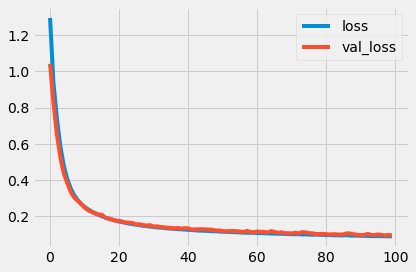

In [23]:
metrics = ['loss','val_loss']
for metric in metrics:
    plt.plot(history.history[metric], label=metric)

plt.legend()
plt.tight_layout()

# Dropout

You want to even out your workouts, otherwise you may have some strange results...

<img src='img/homer-dropout-comparison.jpg'/>

Well, our neural network models are the same way. The model should get _evenly_ trained. We don't want to train the same node/pathway over and over again.
We'll assign probabilities of 'dropout' and then let fate decide.

So what does dropout do? At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections as shown below.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-03-at-11.52.06-PM.png)

So each iteration has a different set of nodes and this results in a different set of outputs. It can also be thought of as an ensemble technique in machine learning.

Ensemble models usually perform better than a single model as they capture more randomness. Similarly, dropout also performs better than a normal neural network model.


## Avoiding the Self-Perpetuating Strength Training

When working out, we'd train our left and right arms evenly and switch our exercise routine throughout the week.

In neural networks, we switch around which nodes we use during our training.

Assign a probability of using a given node for that epoch (usually about 20% chance). When we have many epochs, we likely will even out the randomness

<img src='img/layered-neural-net.jpg'/>

## Example Code

In [24]:
n_classes = 10

model = Sequential()

# Input Layer
model.add(Dense(32, input_dim=64, activation='relu', name='input_layer'))
model.add(Dropout(0.2, name='input_dropout'))
# Hidden Layer
model.add(Dense(24, activation='relu', name='hidden_layer1'))
model.add(Dropout(0.2, name='hidden_layer1_dropout'))
# Hidden Layer
model.add(Dense(24, activation='relu', name='hidden_layer2'))
model.add(Dropout(0.2, name='hidden_layer2_dropout'))
# Output Layer
model.add(Dense(n_classes, activation='softmax', name='output'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 32)                2080      
_________________________________________________________________
input_dropout (Dropout)      (None, 32)                0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 24)                792       
_________________________________________________________________
hidden_layer1_dropout (Dropo (None, 24)                0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 24)                600       
_________________________________________________________________
hidden_layer2_dropout (Dropo (None, 24)                0         
_________________________________________________________________
output (Dense)               (None, 10)               

In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid)
)

Epoch 1/100
36/36 [==============================] - 1s 5ms/step - loss: 3.4690 - accuracy: 0.1131 - val_loss: 2.2278 - val_accuracy: 0.1597
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 2.3473 - accuracy: 0.1810 - val_loss: 1.9986 - val_accuracy: 0.3924
Epoch 3/100
36/36 [==============================] - 0s 2ms/step - loss: 2.0720 - accuracy: 0.2724 - val_loss: 1.7282 - val_accuracy: 0.5486
Epoch 4/100
36/36 [==============================] - 0s 2ms/step - loss: 1.8449 - accuracy: 0.3464 - val_loss: 1.4303 - val_accuracy: 0.6528
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 1.6225 - accuracy: 0.4621 - val_loss: 1.1578 - val_accuracy: 0.7535
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 1.4524 - accuracy: 0.5048 - val_loss: 0.9700 - val_accuracy: 0.7743
Epoch 7/100
36/36 [==============================] - 0s 2ms/step - loss: 1.3057 - accuracy: 0.5457 - val_loss: 0.7998 - val_accuracy: 0.8160
Epoch 8/100
3

Epoch 59/100
36/36 [==============================] - 0s 1ms/step - loss: 0.2090 - accuracy: 0.9391 - val_loss: 0.1469 - val_accuracy: 0.9618
Epoch 60/100
36/36 [==============================] - 0s 1ms/step - loss: 0.1965 - accuracy: 0.9399 - val_loss: 0.1354 - val_accuracy: 0.9583
Epoch 61/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.9330 - val_loss: 0.1445 - val_accuracy: 0.9583
Epoch 62/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9408 - val_loss: 0.1380 - val_accuracy: 0.9722
Epoch 63/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.9399 - val_loss: 0.1340 - val_accuracy: 0.9722
Epoch 64/100
36/36 [==============================] - 0s 2ms/step - loss: 0.2072 - accuracy: 0.9408 - val_loss: 0.1451 - val_accuracy: 0.9688
Epoch 65/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9391 - val_loss: 0.1334 - val_accuracy: 0.9688
Epoch 

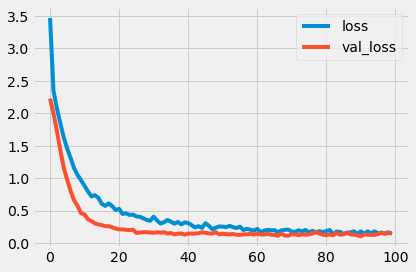

In [26]:
metrics = ['loss','val_loss']
for metric in metrics:
    plt.plot(history.history[metric], label=metric)

plt.legend()
plt.tight_layout()

## Final Notes

### On batch size: 
- Starting with a batch size of 32 is a good idea. If you receive mini-batch errors you could try reducing the size of your batch by powers of 2(128->64->32->16) 
- If your model trains well(cost is reducing consistently) but each epoch takes a long time to run, you could try increasing your batch size(you will need ram to spare). Also, you are more likely to get caught at a local minimum with larger batches. 

### On Optimization functions: 
- Check out [THIS](https://github.com/Amberlynnyandow/bsc-lecture-material/blob/main/phase_4/optimizations.ipynb) notebook for more details on different optimizers and their uses. 